In [13]:
import pandas as pd

# Load Titanic dataset from CSV (update with correct path)
titanic = pd.read_csv("train.csv")

# Display first few rows
titanic.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
test_data = pd.read_csv("test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
# Fill missing Age values with median
titanic["Age"].fillna(titanic["Age"].median(), inplace=True)

# Fill missing Embarked values with most common value
titanic["Embarked"].fillna(titanic["Embarked"].mode()[0], inplace=True)

# Drop Cabin column (too many missing values)
titanic.drop("Cabin", axis=1, inplace=True)


In [4]:
# Convert 'Sex' to numeric (Male = 0, Female = 1)
titanic["Sex"] = titanic["Sex"].map({"male": 0, "female": 1})

# Convert 'Embarked' to numeric (C = 0, Q = 1, S = 2)
titanic["Embarked"] = titanic["Embarked"].map({"C": 0, "Q": 1, "S": 2})

# Create new feature: Family Size
titanic["FamilySize"] = titanic["SibSp"] + titanic["Parch"] + 1

# Drop irrelevant columns
titanic.drop(["PassengerId", "Name", "Ticket"], axis=1, inplace=True)


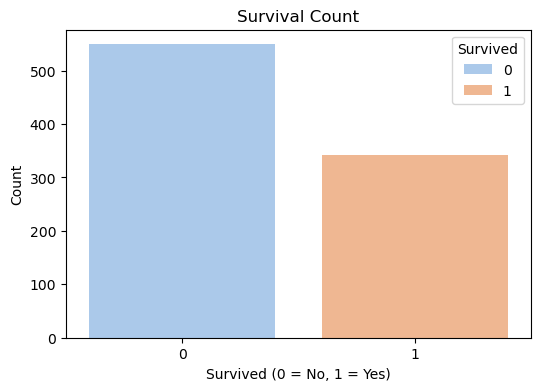

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot Survival Count
plt.figure(figsize=(6,4))
sns.countplot(x="Survived", hue="Survived", data=titanic, palette="pastel", dodge=False)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()


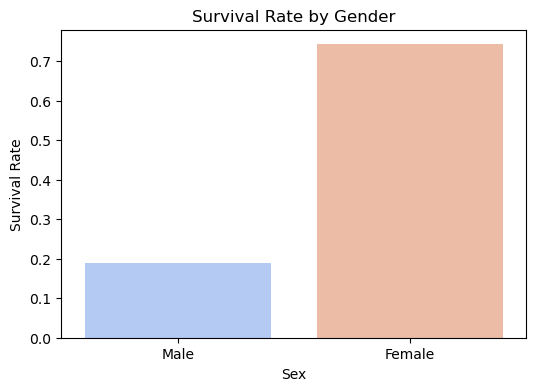

In [6]:
# Plot Survival Rate by Gender (Updated)
plt.figure(figsize=(6,4))
sns.barplot(x="Sex", y="Survived", hue="Sex", data=titanic, palette="coolwarm", dodge=False, errorbar=None)
plt.title("Survival Rate by Gender")
plt.xticks(ticks=[0,1], labels=["Male", "Female"])
plt.ylabel("Survival Rate")
plt.legend([],[], frameon=False)  # Hide redundant legend
plt.show()



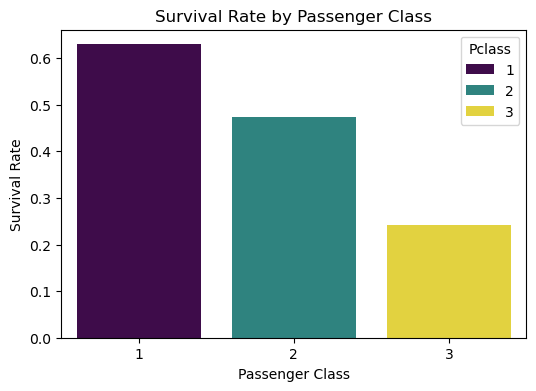

In [7]:
# Plot Survival Rate by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x="Pclass", y="Survived",hue="Pclass", data=titanic, palette="viridis", errorbar= None)
plt.title("Survival Rate by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Survival Rate")
plt.show()


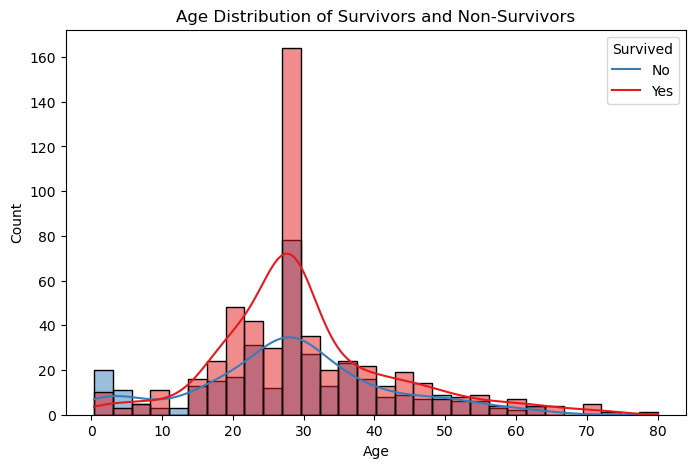

In [8]:
# Plot Age Distribution with Survival Comparison
plt.figure(figsize=(8,5))
sns.histplot(data=titanic, x="Age", hue="Survived", bins=30, kde=True, palette="Set1")
plt.title("Age Distribution of Survivors and Non-Survivors")
plt.xlabel("Age")
plt.ylabel("Count")
plt.legend(title="Survived", labels=["No", "Yes"])
plt.show()


In [9]:
from sklearn.model_selection import train_test_split

# Define Features (X) and Target (y)
X = titanic.drop("Survived", axis=1)  # All features except "Survived"
y = titanic["Survived"]  # Target variable

# Split into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create and train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")


Logistic Regression Accuracy: 0.8101


              precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



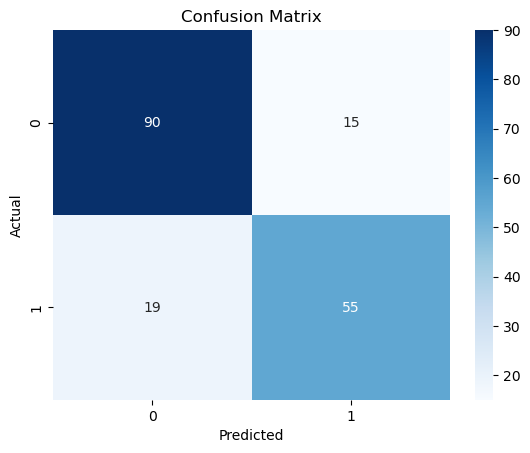

In [11]:
from sklearn.metrics import classification_report, confusion_matrix

# Print classification report
print(classification_report(y_test, y_pred))

# Display Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)

# Calculate Accuracy
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")


Random Forest Accuracy: 0.8212
